# EDA - Explaroty Data Analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
data_path = Path('data')

%matplotlib inline

# 1 Extracción datos

In [2]:
data = pd.read_csv(data_path / 'winequality_own.csv')
print(data.shape)
data.head()

(1599, 12)


,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,NaN,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 2. Variables y tipos de datos

**Variables predictoras**

1 - fixed acidity: 

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

**Variable objetivo**

12 - quality (valores entre 0 and 10)

In [4]:
data.dtypes


fixedacidity          float64
volatileacidity       float64
citricacid            float64
residualsugar         float64
chlorides             float64
freesulfurdioxide     float64
totalsulfurdioxide    float64
density               float64
pH                    float64
sulphates             float64
alcohol               float64
quality                 int64
dtype: object

In [6]:
data['quality'] = [0 if q < 7 else 1 for q in data['quality']]
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

([<matplotlib.patches.Wedge at 0x2457d0ce770>,
 [Text(-1.001531680314258, 0.4549003114165776, 'Malo'),
  Text(1.0925800148882814, -0.4962548851817211, 'Bueno')],
 [Text(-0.5462900074441406, 0.24812744259086048, '86.4%'),
  Text(0.637338342018164, -0.289482016356004, '13.6%')])

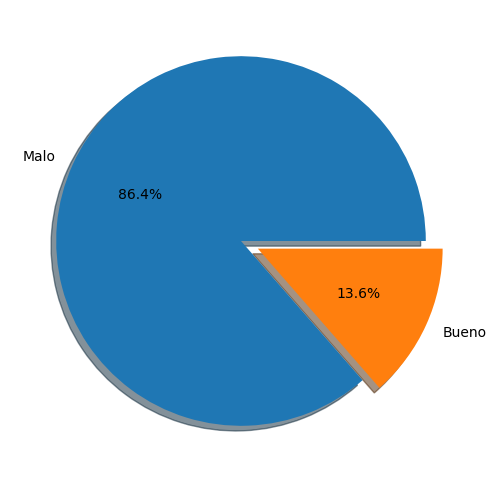

In [9]:
porc = data['quality'].value_counts(normalize=True)

fig, ax =plt.subplots(figsize=(6,6))
ax.pie(porc, labels=['Malo', 'Bueno'], autopct='%1.1f%%',shadow=True,explode = [0, 0.1])

# 3. Datos Missing

In [13]:
data.isnull().sum()

fixedacidity           0
volatileacidity        0
citricacid            60
residualsugar          0
chlorides             57
freesulfurdioxide      0
totalsulfurdioxide    85
density                0
pH                    54
sulphates             50
alcohol                0
quality                0
dtype: int64

In [14]:
_ = data.isnull().sum() / data.shape[0] * 100
_[_>0]

citricacid            3.752345
chlorides             3.564728
totalsulfurdioxide    5.315822
pH                    3.377111
sulphates             3.126954
dtype: float64

In [15]:
# vamos a rellenar los valores nan con su media
cols_to_impute = _[_>0].index
cols_to_impute

for col in cols_to_impute:
    data[col].fillna(data[col].mean(), inplace = True)


In [16]:
data.isnull().sum()

fixedacidity          0
volatileacidity       0
citricacid            0
residualsugar         0
chlorides             0
freesulfurdioxide     0
totalsulfurdioxide    0
density               0
pH                    0
sulphates             0
alcohol               0
quality               0
dtype: int64

# 4. Distribución de las variables

In [23]:
data.columns
data.columns.size

12

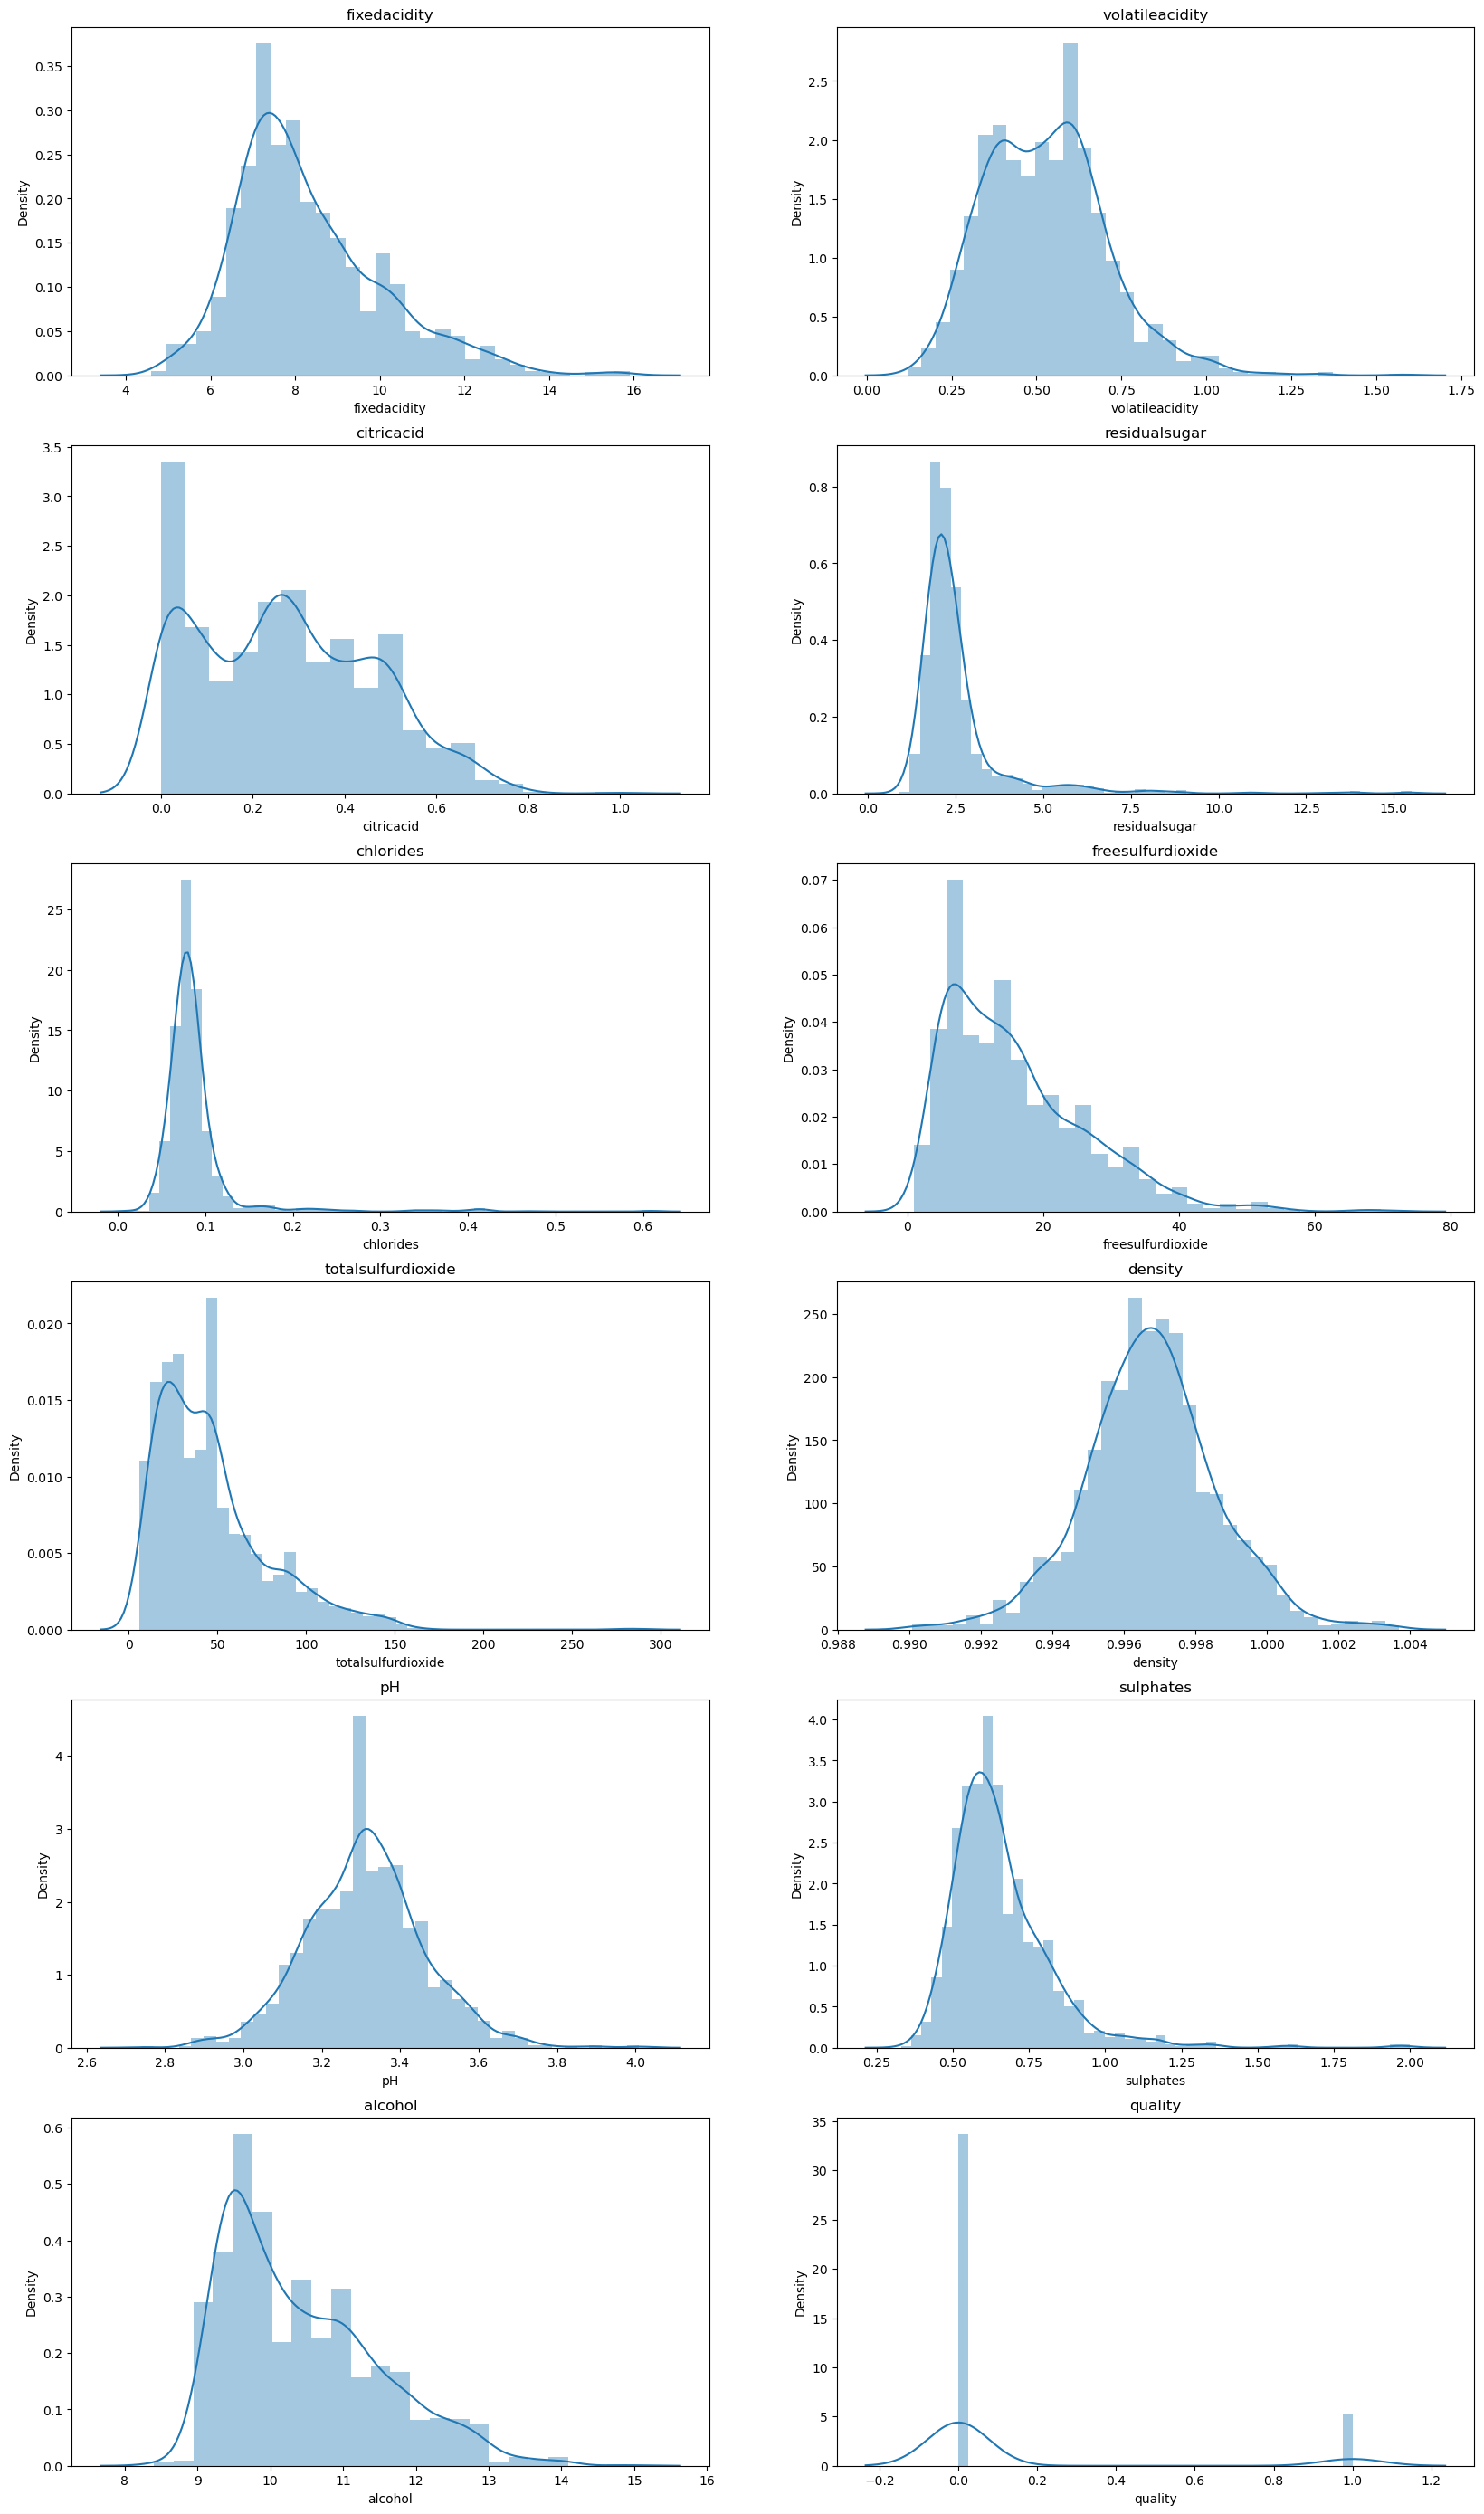

In [39]:
fig, ax = plt.subplots(nrows =int(np.ceil(len(data.columns)/2)),ncols=2,figsize = (20,35))
i, j= 0,0
for ind in data.columns: 
    sns.distplot(data[ind], hist = True, kde = True,ax=ax[i,j])
    ax[i,j].set_title(ind)
    j+=1
    if j==2:
        i+=1
        j=0

##### ahora vamos a mostrar la curtosis y el skewness, ambos cuanto menor valor más aproximados a una distribución normal tendremos

In [41]:
for c in data.columns:
    print(f"------{c}------")
    print("Skewness: %f" % data[c].skew())
    print("Kurtosis: %f" % data[c].kurt())

------fixedacidity------
Skewness: 0.982751
Kurtosis: 1.132143
------volatileacidity------
Skewness: 0.671593
Kurtosis: 1.225542
------citricacid------
Skewness: 0.330718
Kurtosis: -0.698193
------residualsugar------
Skewness: 4.540655
Kurtosis: 28.617595
------chlorides------
Skewness: 5.778518
Kurtosis: 43.628176
------freesulfurdioxide------
Skewness: 1.250567
Kurtosis: 2.023562
------totalsulfurdioxide------
Skewness: 1.562631
Kurtosis: 4.329415
------density------
Skewness: 0.071288
Kurtosis: 0.934079
------pH------
Skewness: 0.201399
Kurtosis: 0.947990
------sulphates------
Skewness: 2.452750
Kurtosis: 11.967317
------alcohol------
Skewness: 0.860829
Kurtosis: 0.200029
------quality------
Skewness: 2.129363
Kurtosis: 2.537360


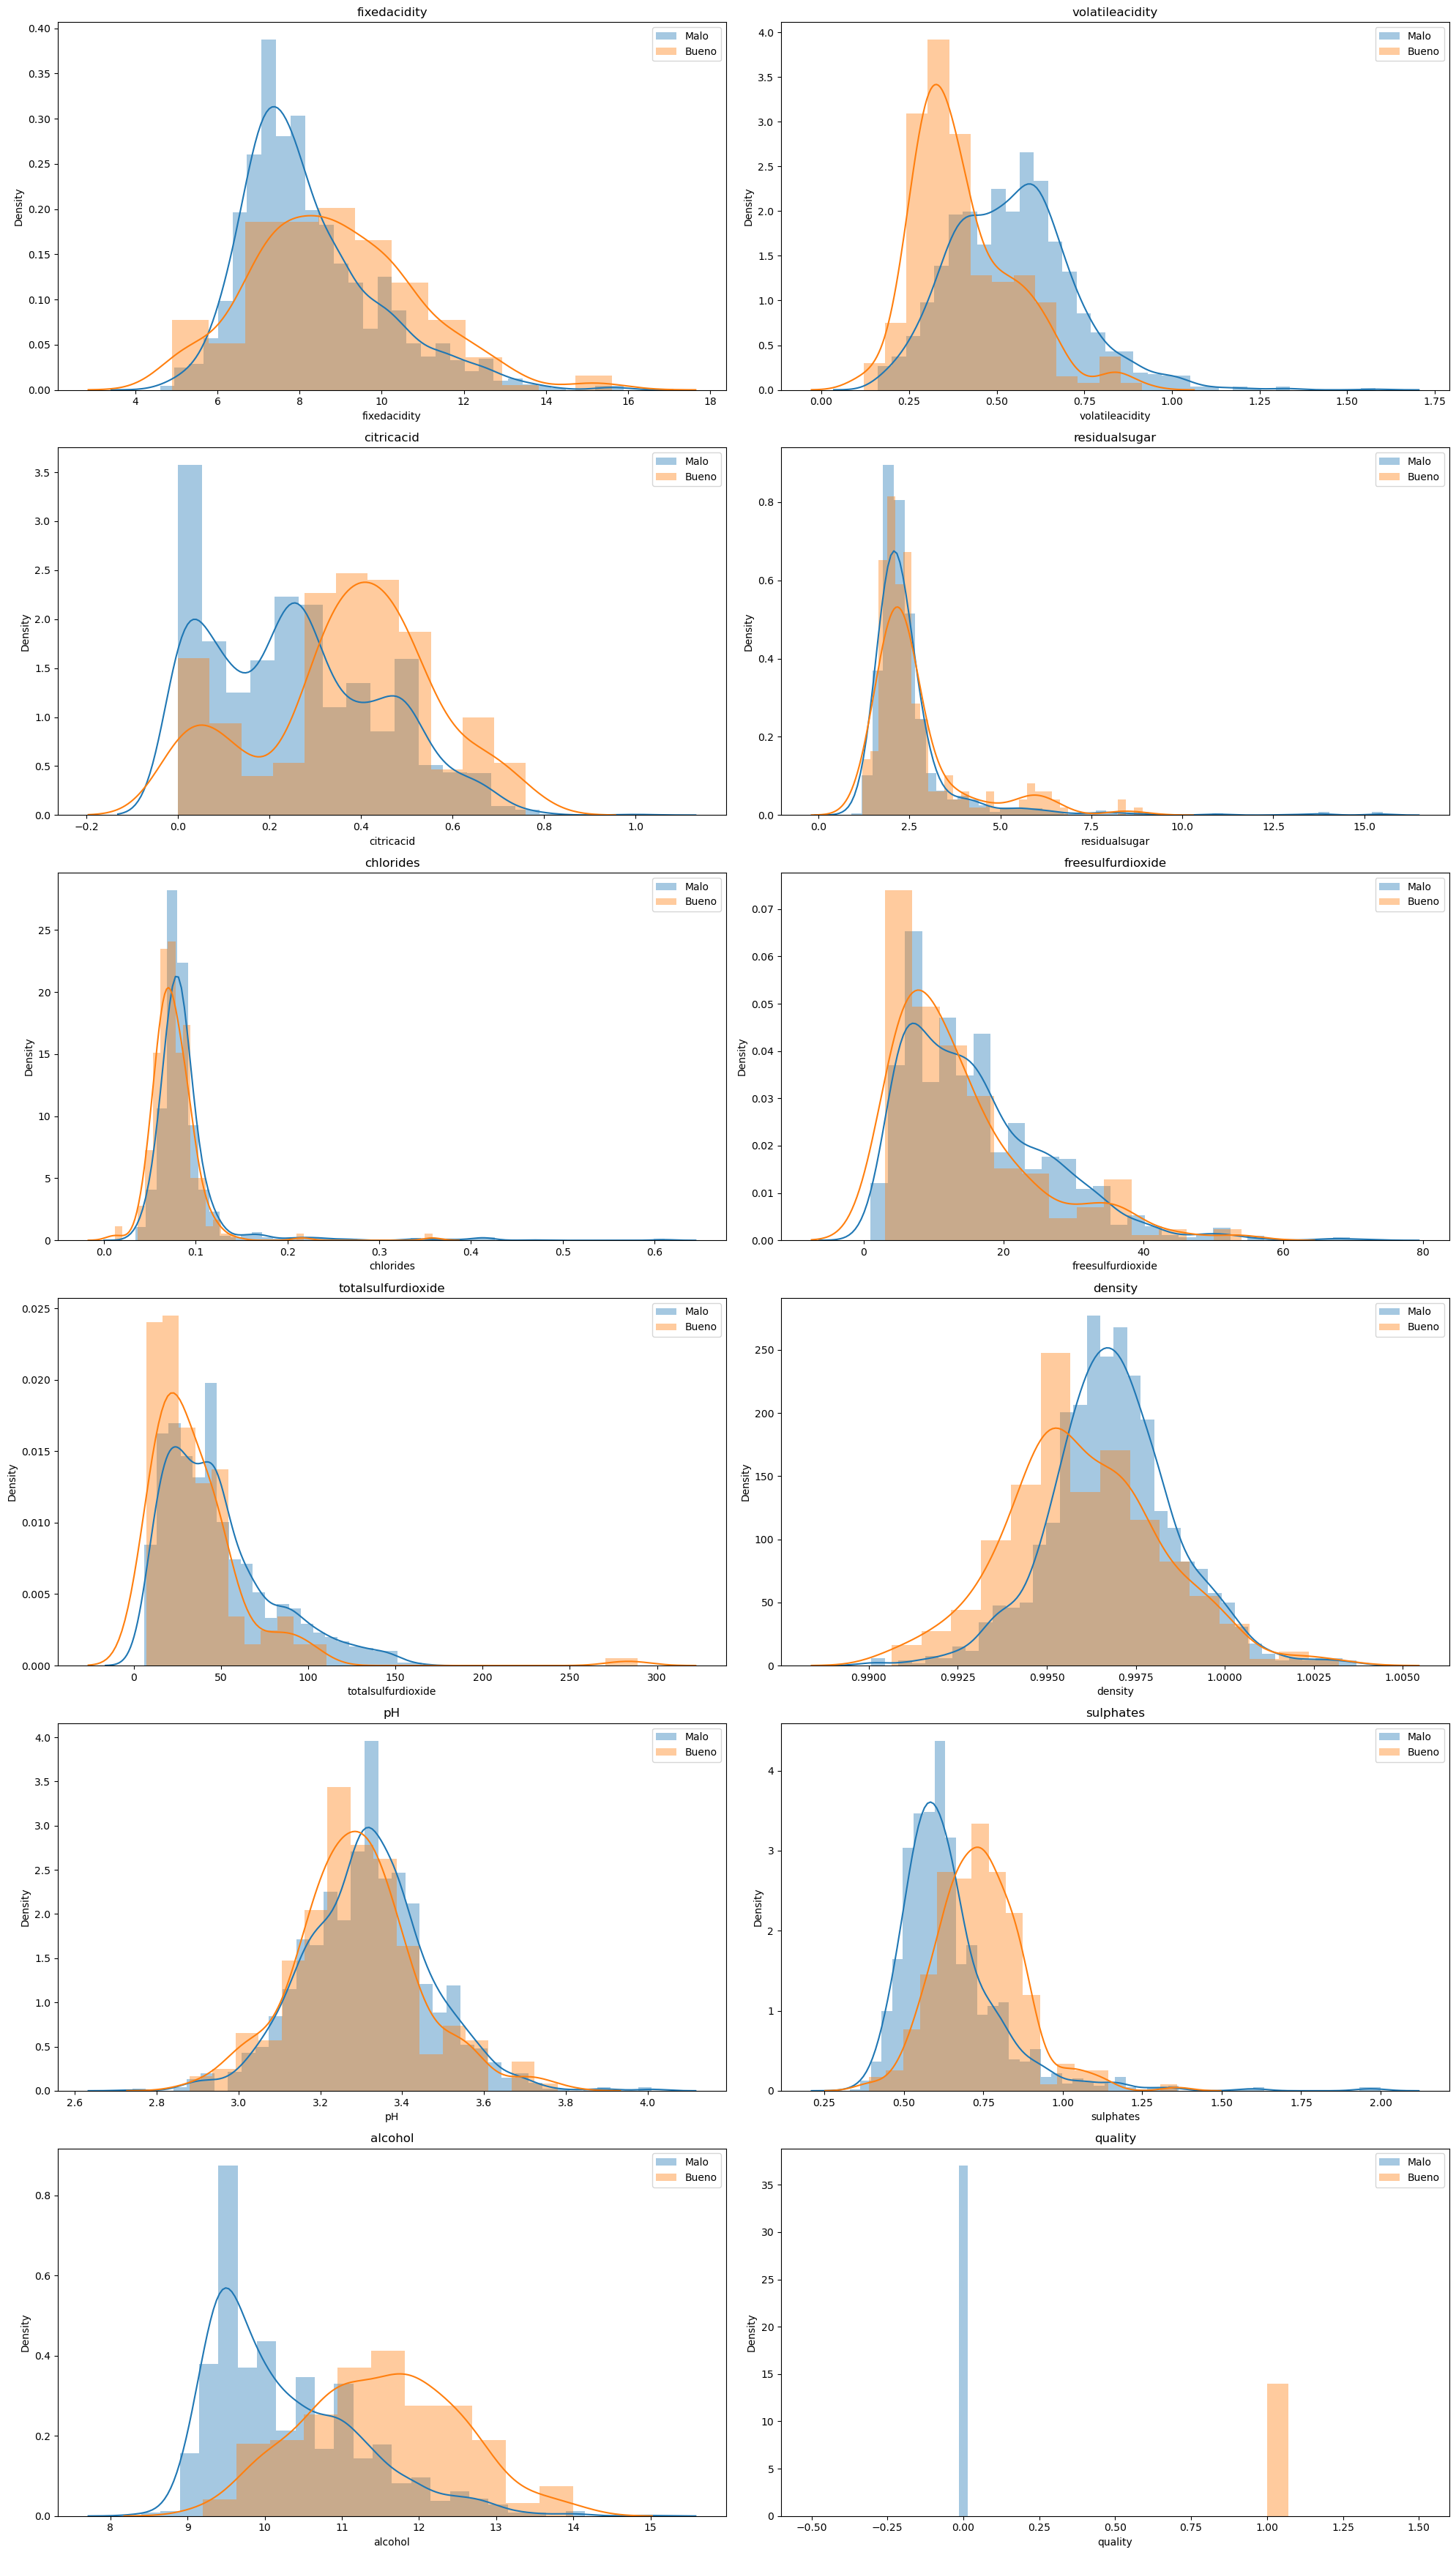

In [42]:
cols = data.columns

fig, ax = plt.subplots(nrows=int(np.ceil(len(cols)/2)), ncols = 2, figsize = (20, 35))

i,j = 0,0
for c in cols:
    sns.distplot(data.query('quality == 0')[c], hist = True, kde = True, ax = ax[i,j], label = 'Malo')
    sns.distplot(data.query('quality == 1')[c], hist = True, kde = True, ax = ax[i,j], label = 'Bueno')

    ax[i,j].set_title(c)
    ax[i,j].legend()
    
    j+=1
    if j==2:
        i+=1
        j=0
        
plt.tight_layout()

# 5. Valores anómalos

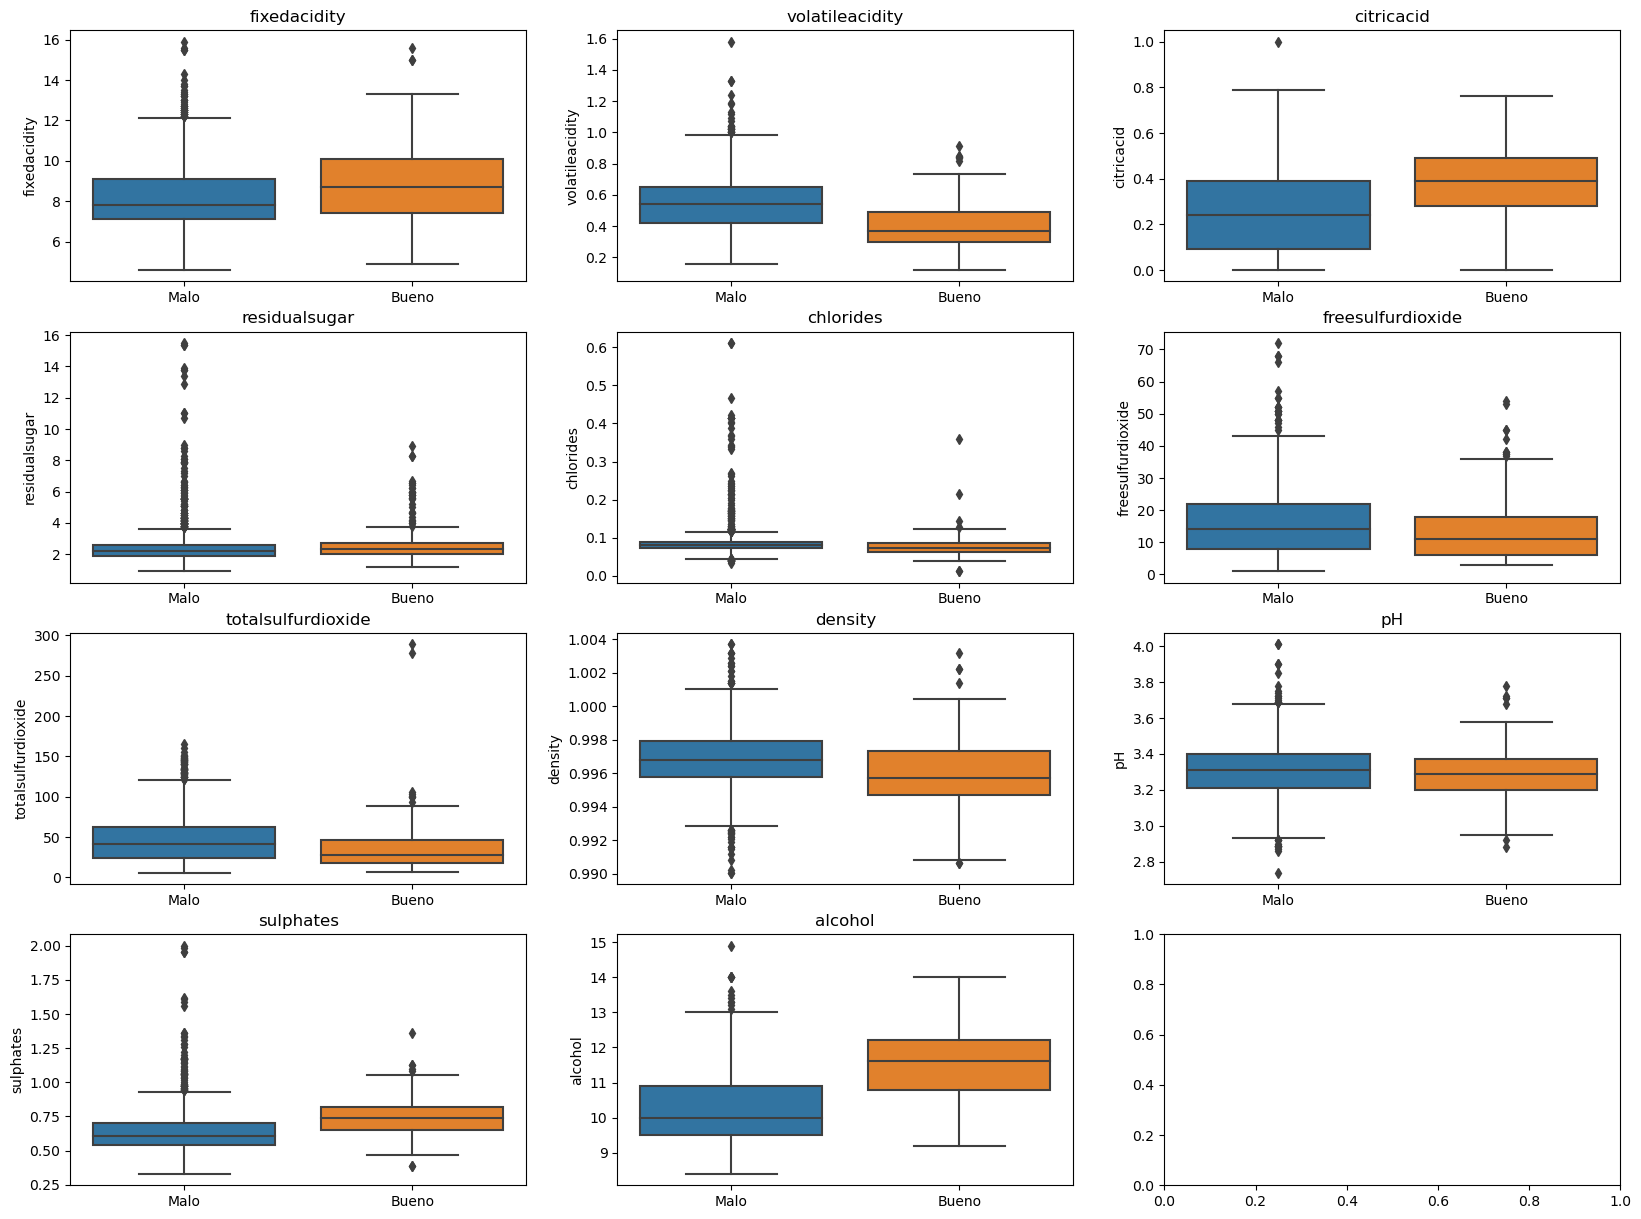

In [44]:
fig, ax = plt.subplots(nrows=int(np.ceil(len(cols)/3)), ncols = 3, figsize = (20, 15))

i,j = 0,0
for c in cols.delete(-1):
    sns.boxplot(x = 'quality', y = c, data = data, ax = ax[i,j], )
    ax[i,j].set_title(c)
    ax[i,j].set_xlabel('')
    ax[i,j].set_xticklabels(np.array(['Malo', 'Bueno']))
    
    j+=1
    if j==3:
        j=0
        i+=1

#### puedes ver que los puntos sueltos son los outliners

# 6. Correlacion entre variables

In [46]:
data.corr()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
fixedacidity,1.000000,-0.256131,0.658415,0.114777,0.089660,-0.153794,-0.110912,0.668047,-0.671008,0.179662,-0.061668,0.120061
volatileacidity,-0.256131,1.000000,-0.539444,0.001918,0.067037,-0.010504,0.068239,0.022026,0.227114,-0.256890,-0.202288,-0.270712
citricacid,0.658415,-0.539444,1.000000,0.146386,0.194566,-0.059988,0.033688,0.357698,-0.512748,0.305587,0.114344,0.206696
residualsugar,0.114777,0.001918,0.146386,1.000000,0.061164,0.187049,0.209031,0.355283,-0.087081,0.005655,0.042075,0.047779
chlorides,0.089660,0.067037,0.194566,0.061164,1.000000,0.004533,0.046144,0.196296,-0.265834,0.360740,-0.220539,-0.094592
freesulfurdioxide,-0.153794,-0.010504,-0.059988,0.187049,0.004533,1.000000,0.652670,-0.021946,0.070299,0.050859,-0.069408,-0.071747
totalsulfurdioxide,-0.110912,0.068239,0.033688,0.209031,0.046144,0.652670,1.000000,0.068133,-0.063718,0.052170,-0.190833,-0.131740
density,0.668047,0.022026,0.357698,0.355283,0.196296,-0.021946,0.068133,1.000000,-0.333608,0.150267,-0.496180,-0.150460
pH,-0.671008,0.227114,-0.512748,-0.087081,-0.265834,0.070299,-0.063718,-0.333608,1.000000,-0.187601,0.197250,-0.060282
sulphates,0.179662,-0.256890,0.305587,0.005655,0.360740,0.050859,0.052170,0.150267,-0.187601,1.000000,0.087507,0.190729


<Axes: >

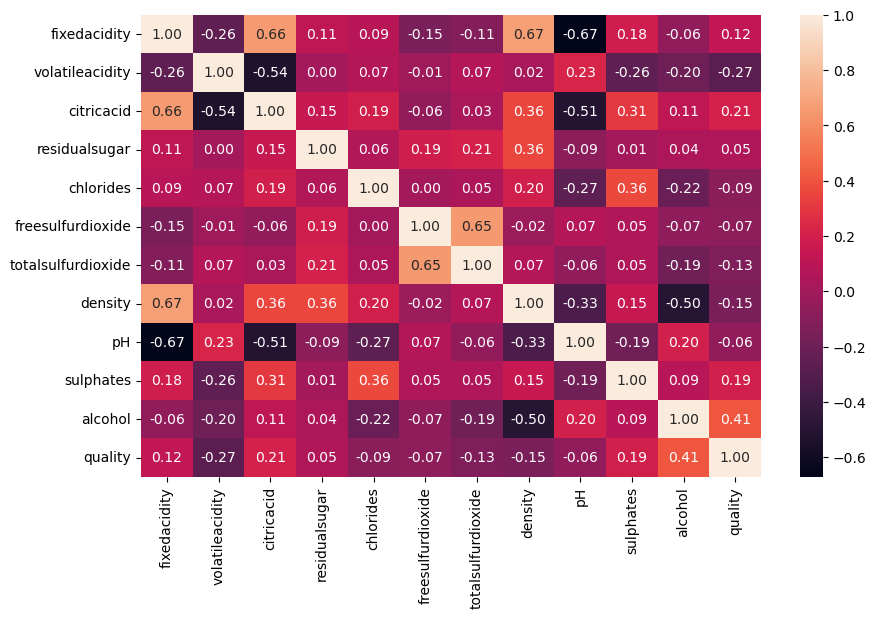

In [49]:
fig, ax = plt.subplots(figsize = (10,6))

sns.heatmap(data.corr(), annot =True, fmt = '.2f')

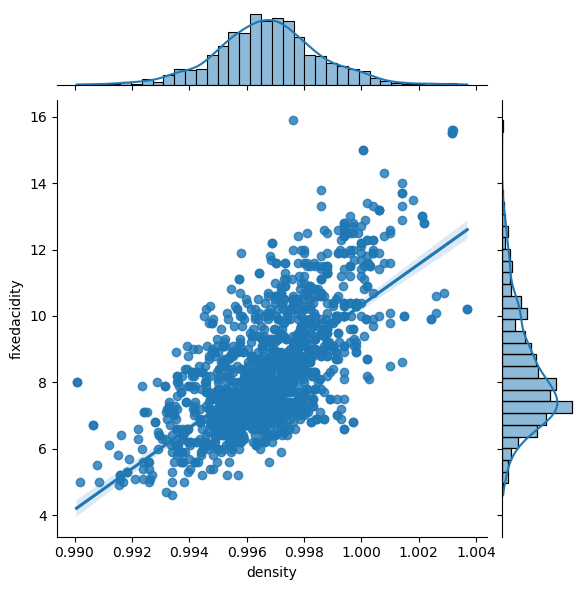

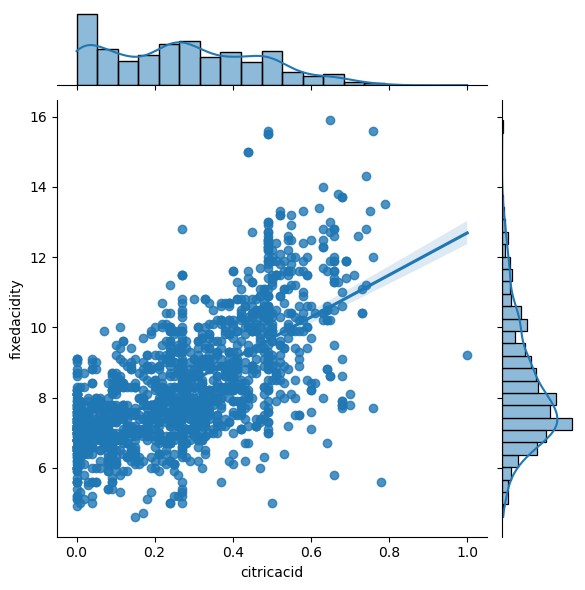

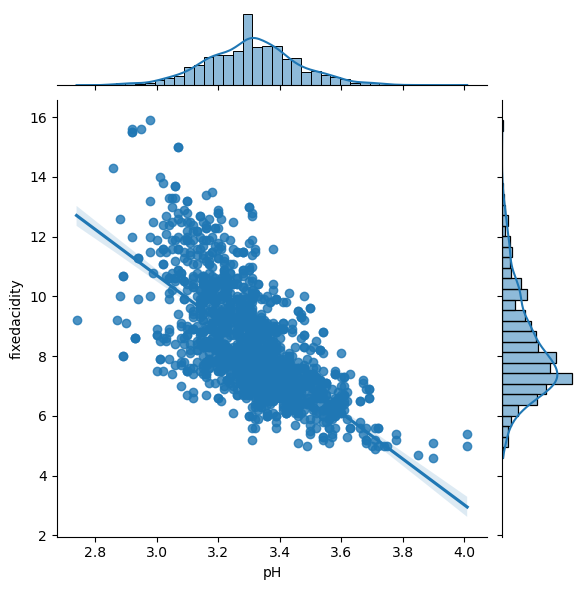

In [50]:
corr_col = ['density', 'citricacid', 'pH']

for c in corr_col:
    sns.jointplot(x = c, y = 'fixedacidity', data = data, kind = 'reg')

# 7. Ingeniería de variables

#### acidez total

In [53]:
data['totalacidity'] = data['fixedacidity'] + data['volatileacidity']

#### sulfuro fixeado

In [54]:
data['Fixedsulfurdioxide'] = data['totalsulfurdioxide'] -data['freesulfurdioxide']

#### mso2

In [56]:
data['msO2'] = data['freesulfurdioxide'] / (1 + np.power(10 , data['pH']-1.81))

In [57]:
data.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality,totalacidity,Fixedsulfurdioxide,msO2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.560000,9.4,0,8.10,23.0,0.215185
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.658896,9.8,0,8.68,42.0,0.978585
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.650000,9.8,0,8.56,39.0,0.513983
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.580000,9.8,0,11.48,43.0,0.726893
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.560000,9.4,0,8.10,23.0,0.215185


<Axes: >

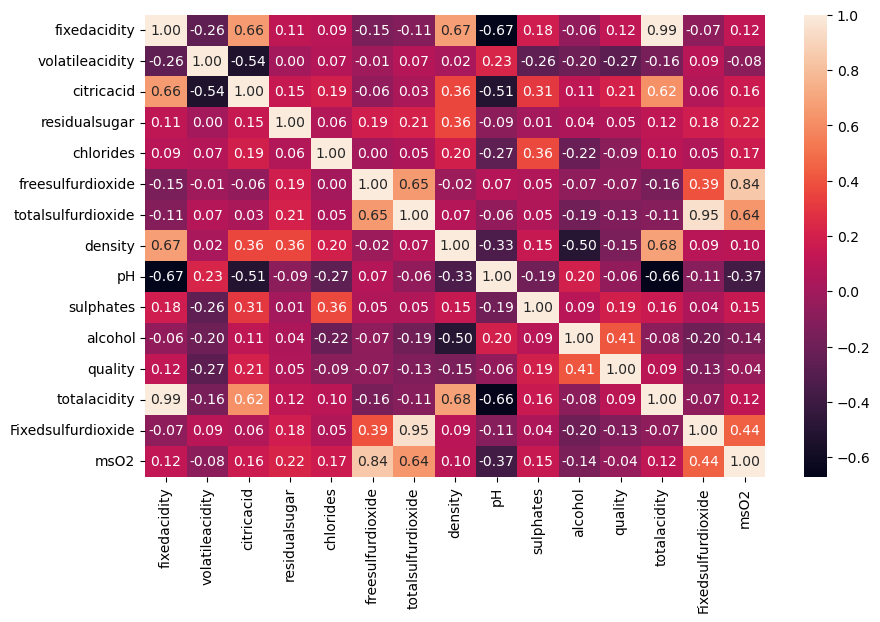

In [58]:
fig, ax = plt.subplots(figsize = (10,6))

sns.heatmap(data.corr(), annot =True, fmt = '.2f')

### Normalización de variables

5.7785175034034815
43.62817604081133


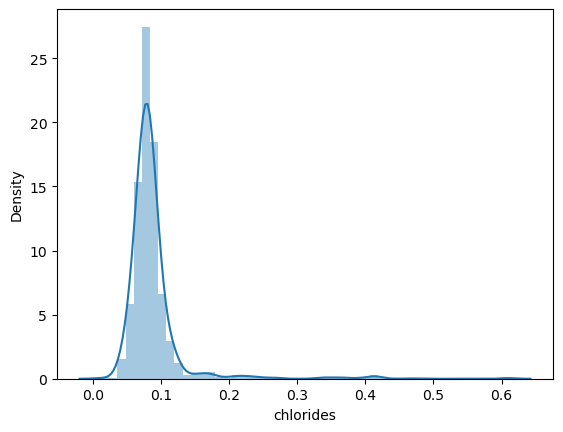

In [60]:
sns.distplot(data['chlorides'], hist = True, kde = True)
print(data['chlorides'].skew())
print(data['chlorides'].kurt())

In [59]:
data['chlorides_log'] = np.log(data['chlorides'])

1.7248588638338684
9.733092436161924


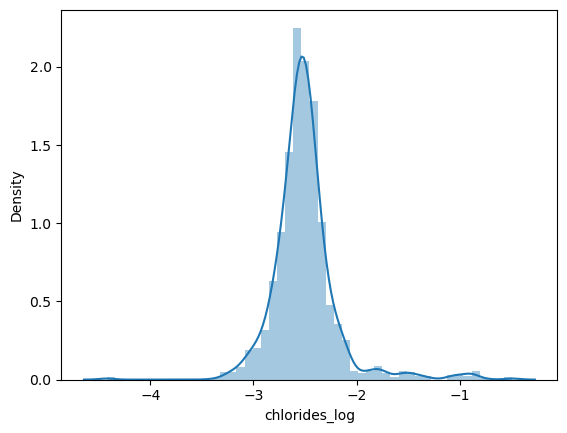

In [61]:
sns.distplot(data['chlorides_log'], hist = True, kde = True)
print(data['chlorides_log'].skew())
print(data['chlorides_log'].kurt())

#### los logaritmos sirven para normalizar

<Axes: >

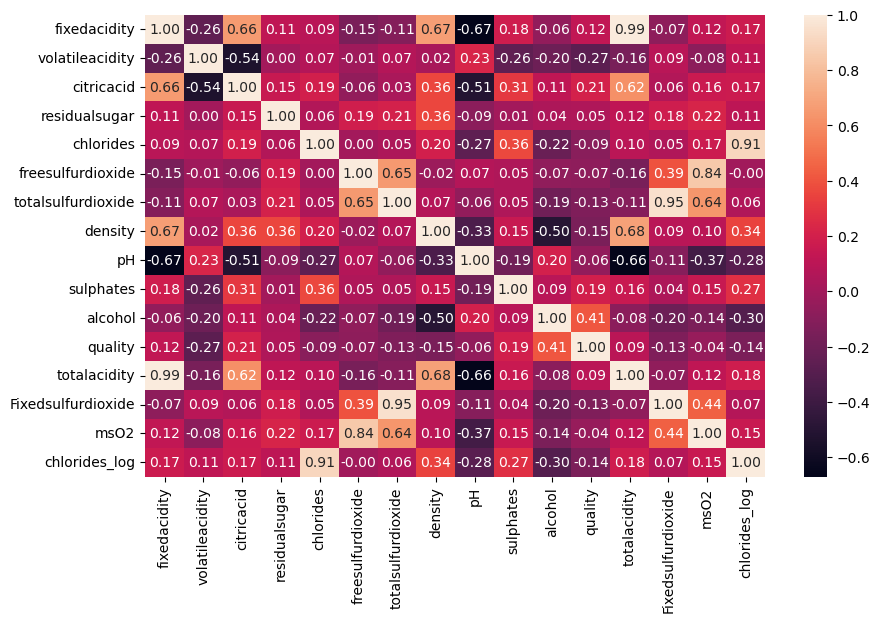

In [62]:
fig, ax = plt.subplots(figsize = (10,6))

sns.heatmap(data.corr(), annot =True, fmt = '.2f')

# 8. Importancia de variables

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [64]:
train, test = train_test_split(data , test_size = 0.3, stratify = data['quality'], random_state = 1234)

In [66]:
X_train = train.drop('quality', axis=1)
y_train = train['quality']

X_test = test.drop('quality', axis=1)
y_test = test['quality']

In [68]:
y_test.value_counts(normalize = True)

0    0.864583
1    0.135417
Name: quality, dtype: float64

### Basado en un árbol

In [70]:
dtc = DecisionTreeClassifier(max_depth=3, random_state = 1234)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1234)

In [73]:
dtc.feature_importances_

array([0.        , 0.10891815, 0.        , 0.02383859, 0.        ,
       0.05819285, 0.        , 0.        , 0.07623855, 0.14795165,
       0.58486021, 0.        , 0.        , 0.        , 0.        ])

In [75]:
feature_importance = pd.Series(dtc.feature_importances_,index = X_train.columns)


In [78]:
imp = feature_importance[feature_importance>0]

Text(0.5, 1.0, 'Importancia de variables')

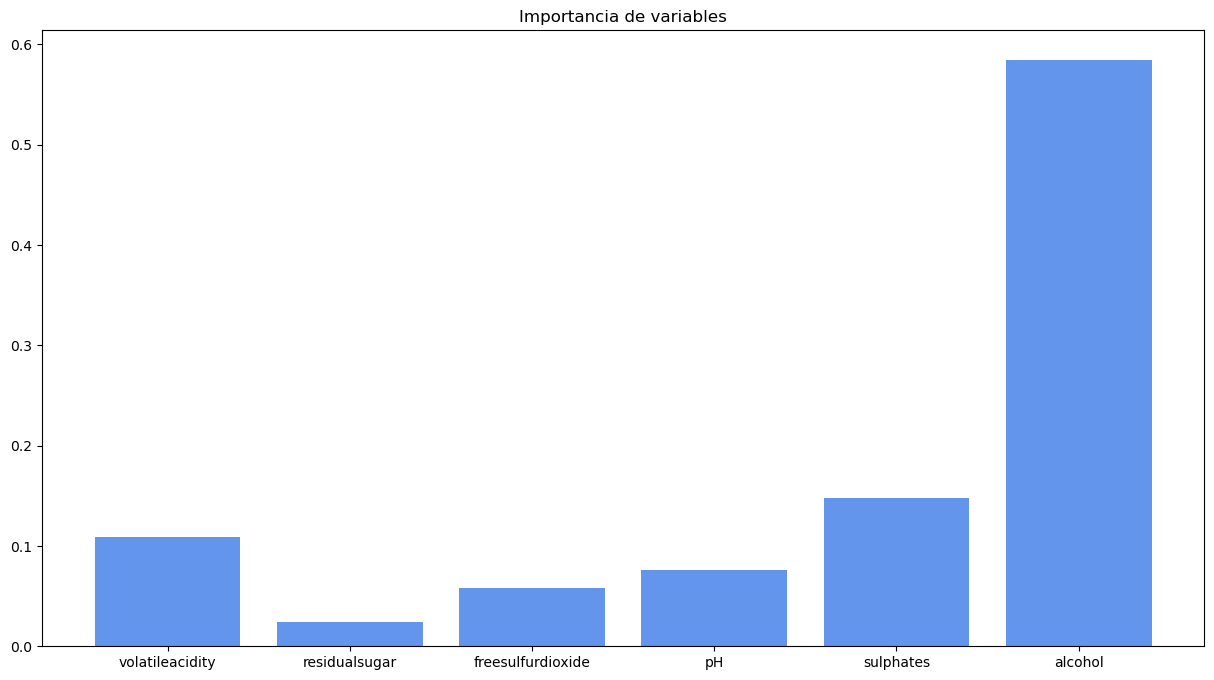

In [79]:
fig, ax = plt.subplots(figsize = (15, 8))

ax.bar(x = imp.index, height = imp.values, color = 'cornflowerblue')

ax.set_title('Importancia de variables')

### Usando técnica como "SelectFromModel"

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel


In [81]:
lr = LogisticRegression()

sfm = SelectFromModel(estimator=lr)

sfm.fit(X_train, y_train)

SelectFromModel(estimator=LogisticRegression())

In [82]:
sfm.estimator_.coef_

array([[ 1.02344121, -2.10679112, -0.09944287,  0.15423517, -0.46104124,
         0.0060873 , -0.006139  , -1.06614302, -3.10757663,  2.02580416,
         0.89816411, -1.08334991, -0.01222631, -0.30706671, -0.85098593]])

In [84]:
fi = pd.Series(sfm.estimator_.coef_[0], index = X_train.columns)
fi

fixedacidity          1.023441
volatileacidity      -2.106791
citricacid           -0.099443
residualsugar         0.154235
chlorides            -0.461041
freesulfurdioxide     0.006087
totalsulfurdioxide   -0.006139
density              -1.066143
pH                   -3.107577
sulphates             2.025804
alcohol               0.898164
totalacidity         -1.083350
Fixedsulfurdioxide   -0.012226
msO2                 -0.307067
chlorides_log        -0.850986
dtype: float64

In [83]:
sfm.get_support()

array([ True,  True, False, False, False, False, False,  True,  True,
        True,  True,  True, False, False, False])

In [87]:
vars_selected = fi[sfm.get_support()].sort_values()

In [88]:
vars_selected

pH                -3.107577
volatileacidity   -2.106791
totalacidity      -1.083350
density           -1.066143
alcohol            0.898164
fixedacidity       1.023441
sulphates          2.025804
dtype: float64

Text(0.5, 1.0, 'Importancia de variables')

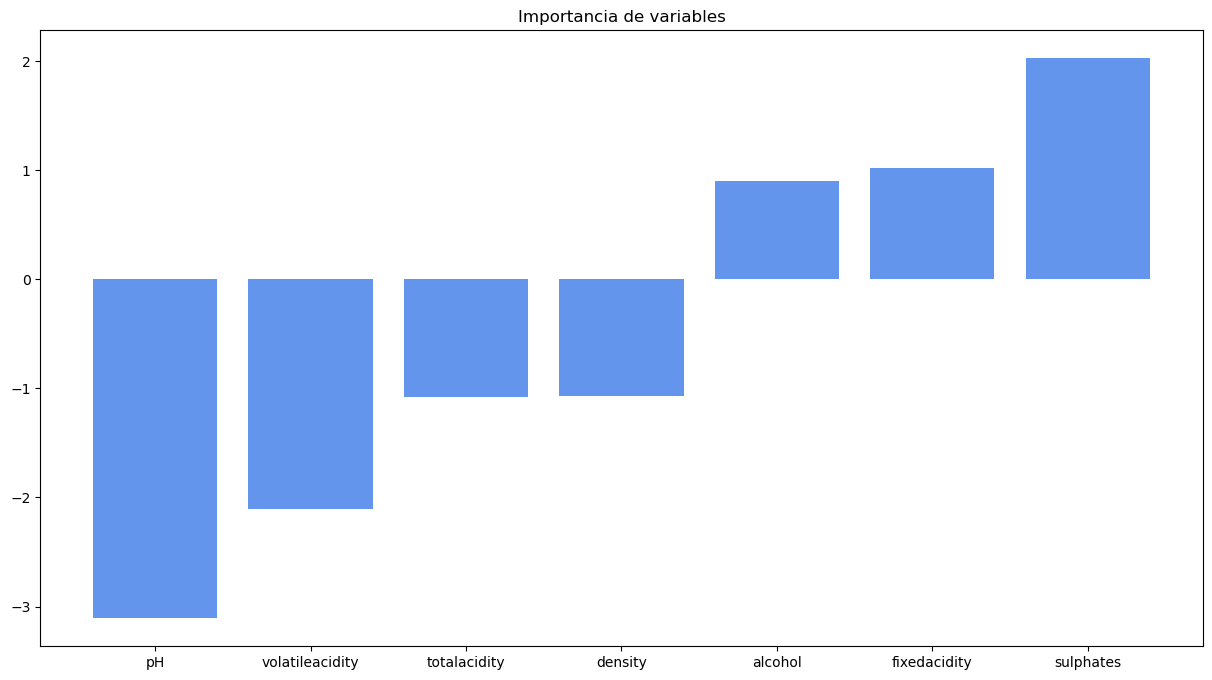

In [89]:
fig, ax = plt.subplots(figsize = (15, 8))

ax.bar(x = vars_selected.index, height = vars_selected, color = 'cornflowerblue')

ax.set_title('Importancia de variables')